# <center>BBM 467 Data Intensive Applications </center>
## <center> Short Data Science Project (SDSP) </center>


![alt text](https://pbs.twimg.com/profile_images/1284609904351891462/_ohTwE1h.jpg)


####  <center> *Dilara İşeri* - *21783561* </center>
#### <center> *Umut Aydemir* - *21827148*  </center>
#### <br><br><center> Group ID : 38  </center>

**Abstract**


In this project, we aimed to design a machine learning model that can diagnose diseases that are difficult to diagnose at a lower cost and in a shorter time. We used a dataset with data on four different diseases to train the machine learning model we created. This dataset includes various characteristics of patients with four different diseases. We use this dataset to predict which of the four different diseases a patient may have and to develop our model. The model we have created determines the percentage of diseases that the patient may have, according to the patient's characteristics. In this project, we used a neural network while creating our model. We used different activation functions to create the neural network model. These ; Relu, Sigmoid, Softmax.In this project, we analyzed and organized the dataset according to the data science methodology stages, and created our model.

## Content

[Problem](#problem)   
[Data UnderStanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)

## Problem <a id="problem"></a>

The first and most important step to treat a disease is to diagnose the disease correctly. Because the treatment of the misdiagnosed disease will also be wrong and the patient will not be able to recover. However, some diseases can be difficult to diagnose by doctors. This situation can have many reasons. The disease may be very rare in humans. And for this reason, doctors may not have much experience with this disease. Apart from this, the tests required to diagnose some diseases can be tiring and costly for the patient. This is an important factor that makes the diagnosis of the disease difficult.

In addition to these, the symptoms shown by the patient may also belong to different diseases. This situation causes doctors to sometimes misdiagnose. This situation is an important problem that needs to be solved. The aim of this project and the main problem it wants to solve is to diagnose diseases that are difficult to diagnose and require expensive examinations, by using resources in the best way and without compromising the quality of health services.

#### Research question in the project:
    - Using machine learning, can it be predicted which of the existing diseases a patient may have?

Throughout the project, we tried to answer the question we mentioned above.



## Data Understanding <a id="data_understanding"></a>

In the section of understanding data, we examined the rows and columns of our existing data and tried to understand our data with descriptive statistics. We analyzed some of the features by drawing a histogram to understand how the features are distributed. In this way, we will have detailed information about the data set before we start data preparation and cleaning.


#### Required Libraries

In [1]:
# Load libraries
import scipy
import sklearn
import pandas as pd
import numpy as np
from pandas import DataFrame

from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()  

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from collections import Counter
from sklearn.datasets import make_classification


In [2]:
# Load dataset
dataFile = "sdsp_patients.xlsx"

df = pd.read_excel(dataFile)


As you can see above, we first read our dataset and created a dataframe. Now we can start analyzing our dataset.

#### Data Dimensions

After reading the dataset, we used "df.shape" to learn the dimension of the dataset. As a result, we saw that our dataset consists of 400 rows and 51 columns.

To get a rough overview of the dataset, we have examined the first 5 lines of our dataset with the df.head () function. Here we have seen that the column "Disease", which is the target label, is the first column of the dataset.

With the df.describe () function, we wanted to learn the numerical properties of the features in the dataset. However, since there are only 4 numeric features in the dataset, this function was not very useful for us. However, we still made a numerical analysis for the numeric properties in the dataset.

We used the df.info () function to learn the data types of columns in the dataset. Here we also learned the non-null record numbers in each column. The result we deduce from the result of this function is that most of the features in the dataset are in the object data type.

In [3]:
df.shape

(400, 51)

In [4]:
df.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


In [5]:
df.describe()

,Feature_2,Feature_4,Feature_5,Feature_44
count,400.000000,400.000000,400.000000,400.000000
mean,29.410125,108.104000,23.038050,0.457500
std,14.350309,49.526425,24.742478,1.547314
min,10.000000,12.000000,0.060000,0.000000
25%,18.000000,64.500000,6.000000,0.000000
50%,25.525000,108.000000,12.000000,0.000000
75%,38.000000,144.000000,36.000000,0.000000
max,90.000000,213.000000,168.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
Disease       400 non-null object
Feature_1     400 non-null object
Feature_2     400 non-null float64
Feature_3     400 non-null object
Feature_4     400 non-null float64
Feature_5     400 non-null float64
Feature_6     400 non-null object
Feature_7     400 non-null object
Feature_8     400 non-null object
Feature_9     400 non-null object
Feature_10    400 non-null object
Feature_11    400 non-null object
Feature_12    400 non-null object
Feature_13    400 non-null object
Feature_14    400 non-null object
Feature_15    400 non-null object
Feature_16    400 non-null object
Feature_17    400 non-null object
Feature_18    400 non-null object
Feature_19    400 non-null object
Feature_20    400 non-null object
Feature_21    400 non-null object
Feature_22    400 non-null object
Feature_23    400 non-null object
Feature_24    400 non-null object
Feature_25    400 non-null object
Feature_

### Show Missing Data

Knowing the number of null values in the dataset is important for a more accurate analysis. For this, a function is defined that takes the data and draws the number of null values. The bars in the chart show the number of missing data. The large number of columns with missing data means that the data set is full of empty data and is not sufficient to create an accurate model.


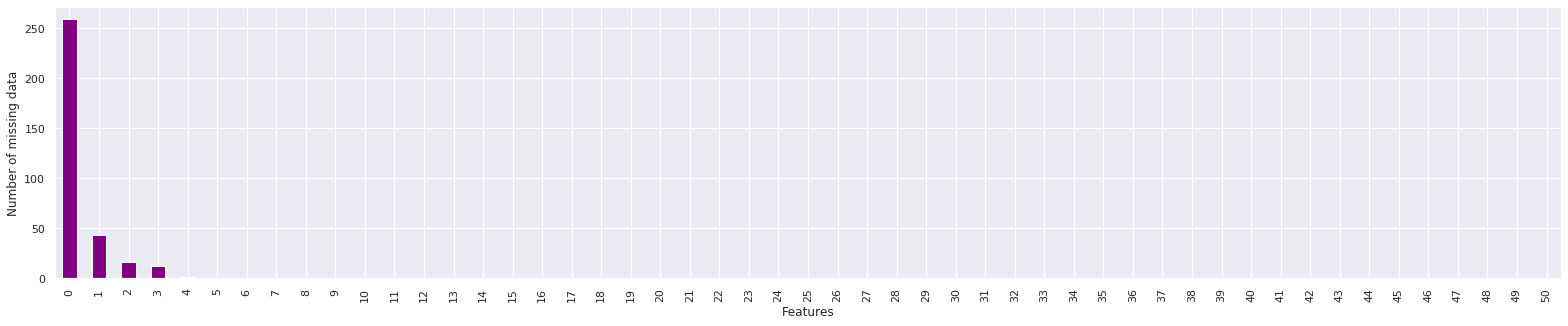

,Total missing,Percentage
Feature_36,259,64.75
Feature_35,43,10.75
Feature_32,16,4.00
Feature_33,12,3.00
Feature_28,1,0.25
Feature_22,0,0.00
Feature_20,0,0.00
Feature_19,0,0.00
Feature_18,0,0.00
Feature_17,0,0.00


In [7]:
def printMissingData (df):
    total = df.isnull().sum().sort_values(ascending=False)

    null_count = df.isnull().count()
    null= df.isnull().sum()

    percentage_missing = (null/null_count).sort_values(ascending=False)
    missing_data = pd.concat([total, percentage_missing*100], axis=1, keys=['Total missing', 'Percentage'])
    
    plt.figure(figsize=(27,5))
    total.plot.bar(color ='purple')
    y = ((lambda x: str(x)) (x) for x in range(len(df.columns)))
    plt.xticks(np.arange(len(df.columns)), (y))

    plt.ylabel("Number of missing data")
    plt.xlabel("Features")
    plt.show()
    return missing_data
missing_data=printMissingData(df)
missing_data

In [8]:
dropped= missing_data[missing_data['Percentage']>1]
x = dropped.index

for i in x:
    
    df.drop([i],axis=1, inplace=True)

Calculating the percentage of missing data and the histogram we have drawn above gives us enough information about the missing data. As can be seen in the histogram, there are a significant number of null values ​​in 4 properties. Especially more than half of Feature_36 is null.

In order to deal with the missing data, we preferred to drop the features with the missing data percentage above 1. The reason we keep this value low is that the number of properties with null values ​​in the dataset is low and dropping these properties will not shrink the dataset.


### Ineffective Properties

If a feature in the dataset has the same value for all rows, it is not determinant for the feature label feature. In this case, it would be meaningless to use this feature while creating a model. For this, we determined the columns with the same value for all rows in the dataset. Then we dropped these columns.

In [9]:
columns = df.columns
for i in columns:
    if(len( df[i].unique()) < 2):
        print(i + ' just contains :  ' + df[i].unique())

['Feature_16 just contains :  No']
['Feature_19 just contains :  No']
['Feature_25 just contains :  No']


In [10]:
columns = df.columns
for i in columns:
    if(len( df[i].unique()) < 2):
        df.drop([i],axis=1, inplace=True)

## Data Analysis

Analyzing the features in the dataset and observing their distribution is an important step for the data preparation phase. In this section, we have created a bar plotting method to observe the distribution of some features in the dataset.

In [11]:
import seaborn as sns
def plot_feature_counts(column_name):
  sns.set(font_scale=1.4)
  df[column_name].value_counts().plot(kind='bar', figsize=(30, 6), rot=0, color='purple')
  plt.xlabel(column_name, labelpad=14)
  plt.ylabel("Count of Patients", labelpad=14)
  plt.title(column_name+ " of the Patients", y=1.02);

#### Disease

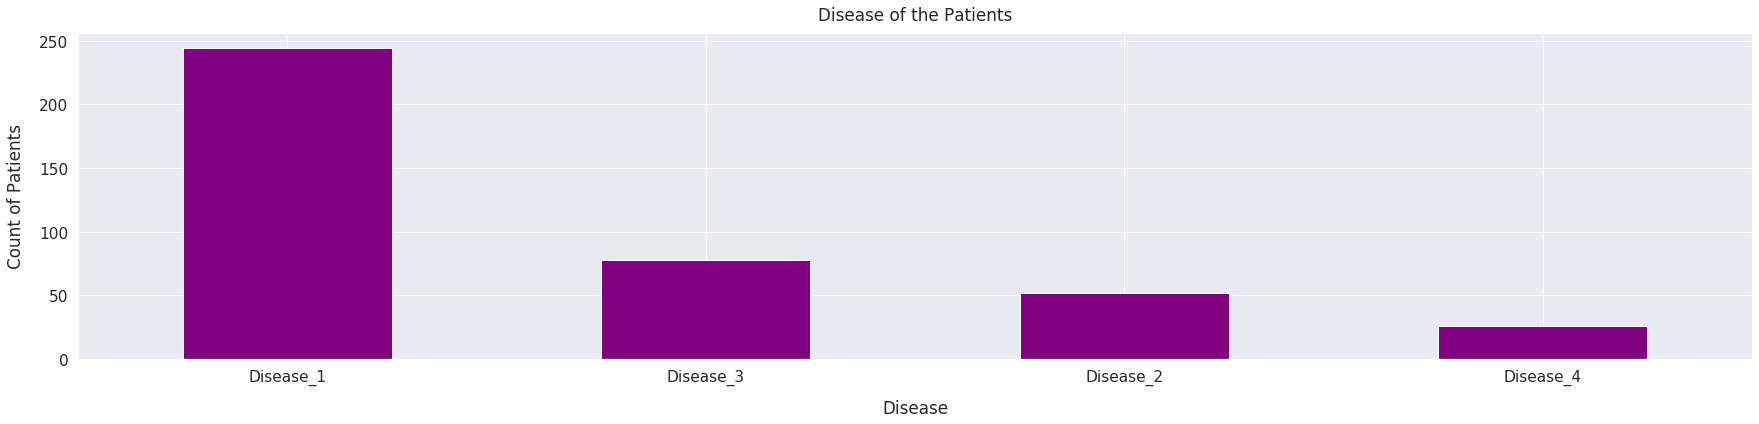

In [12]:
plot_feature_counts('Disease')

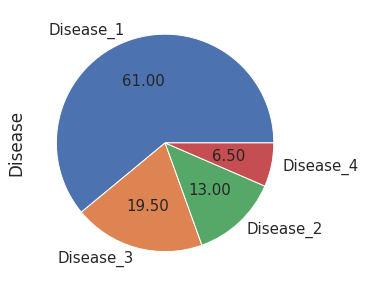

In [13]:
df['Disease'].value_counts().plot(kind='pie',autopct='%.2f', fontsize=15, figsize=(5, 5))

The disease distributions in the data set are clearly shown in the bar plot above. Most of the patients appear to have Disease_1. From this we can conclude that Disease_1 is a more common disease. On the other hand, Disease_4 is likely to be a rare disease. 

We drew a pie plot to see the distribution of diseases more clearly and with their percentages. We observed the percentages of diseases more clearly with the pie plot.

#### Feature_1 (Gender)

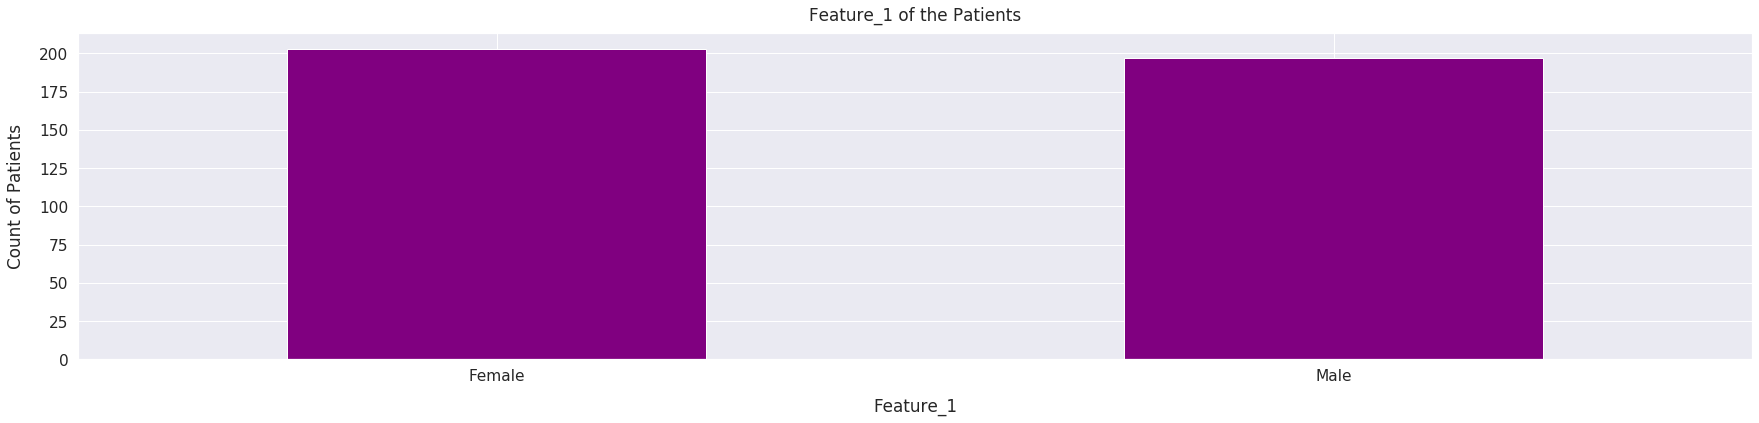

In [14]:
plot_feature_counts('Feature_1')

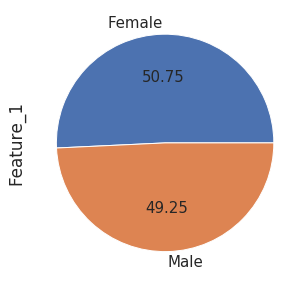

In [15]:
df['Feature_1'].value_counts().plot(kind='pie',autopct='%.2f', fontsize=15, figsize=(5, 5))

We used a bar plot to examine the distribution of patients by gender. However, the values ​​turned out to be very close.

We observed the distribution of gender in percentage with the pie plot. Our conclusion here is that the patients are almost equally and evenly distributed regarding gender.

### Other Features

Since we do not know exactly what the other features represent, we did not do a detailed analysis about the other features. However, it is useful to examine the distribution of several features repeatedly.

#### Feature_6

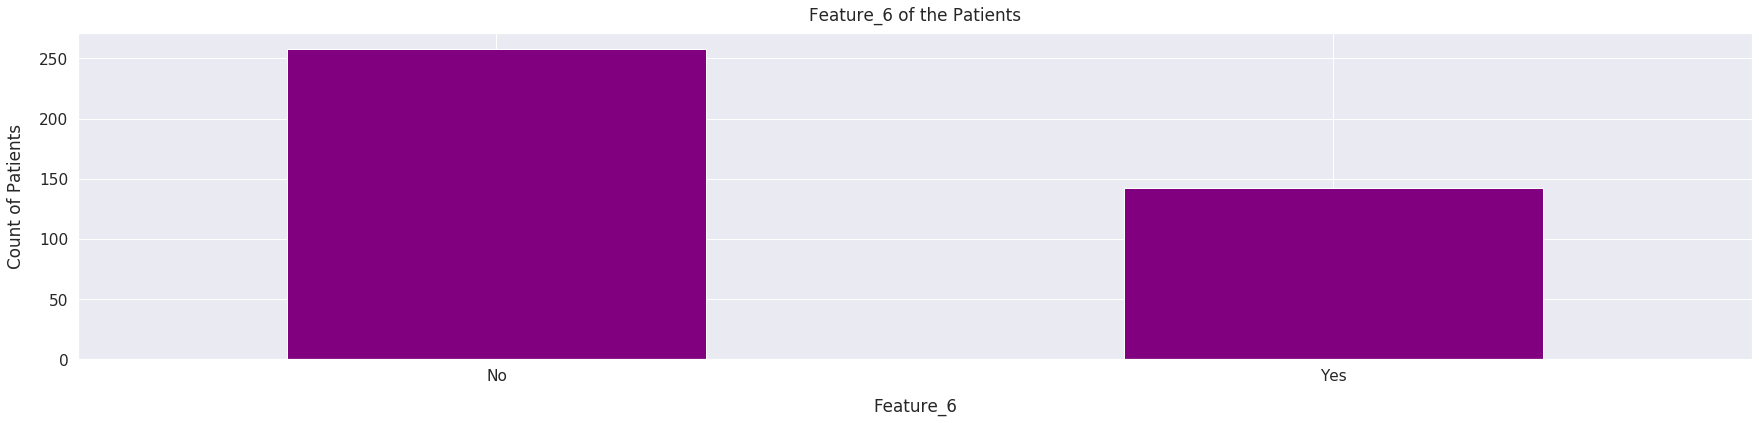

In [16]:
plot_feature_counts('Feature_6')

#### Feature_28

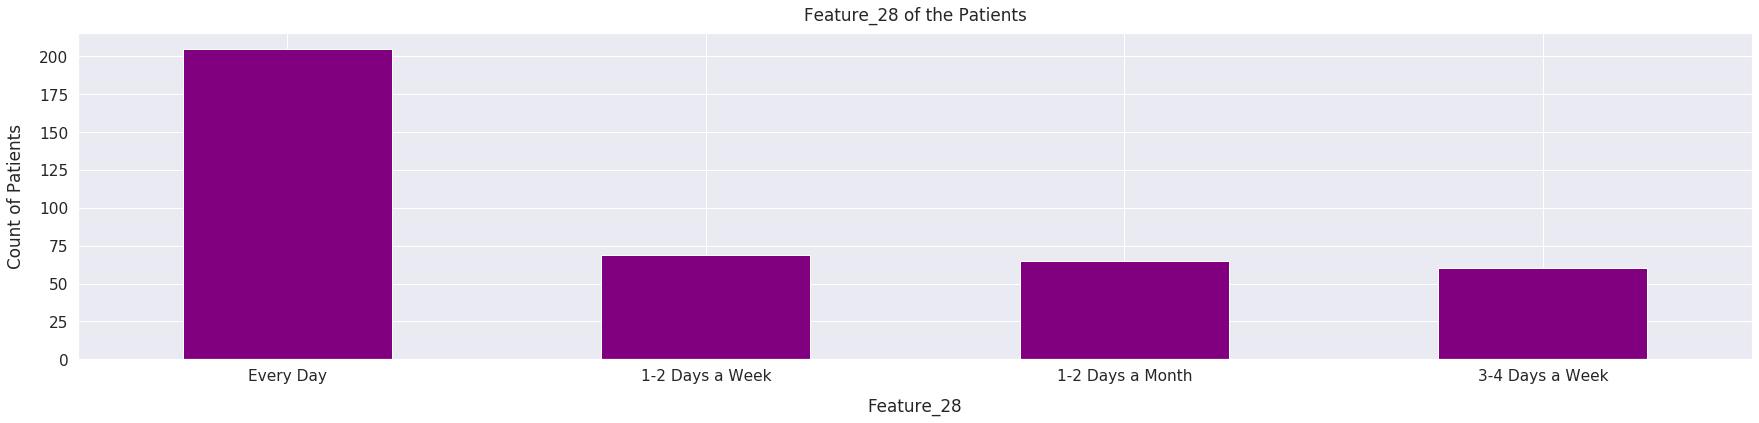

In [17]:
plot_feature_counts('Feature_28')

#### Feature_29

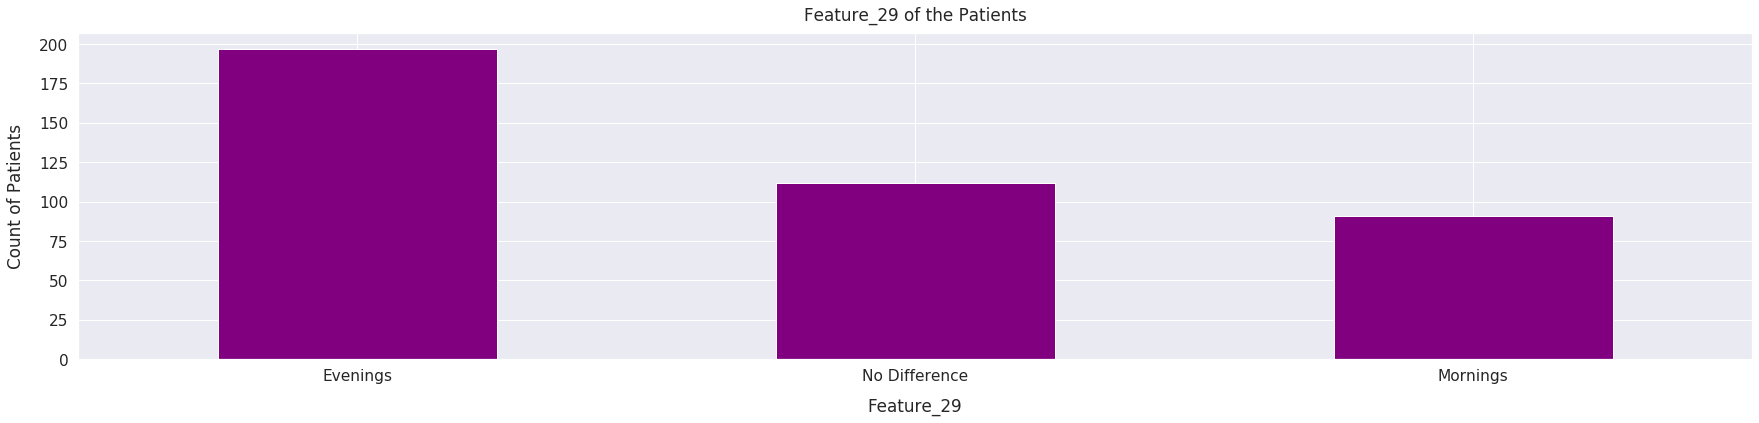

In [18]:
plot_feature_counts('Feature_29')

#### Feature_37

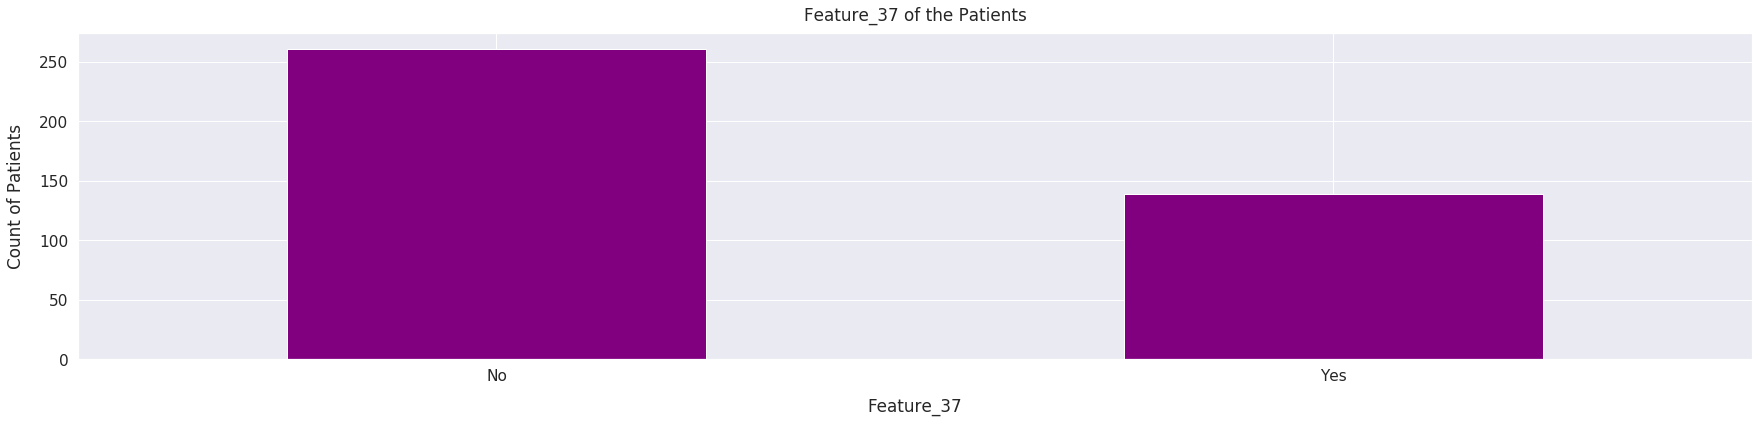

In [19]:
plot_feature_counts('Feature_37')

#### Feature_39

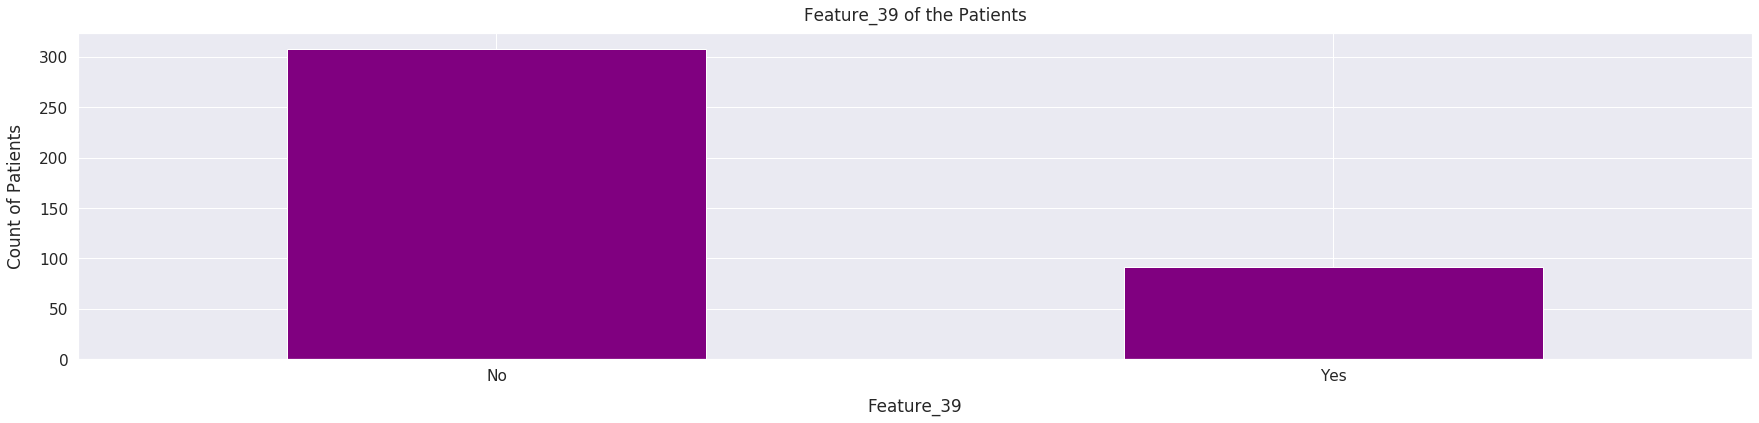

In [20]:
plot_feature_counts('Feature_39')

#### Feature_40

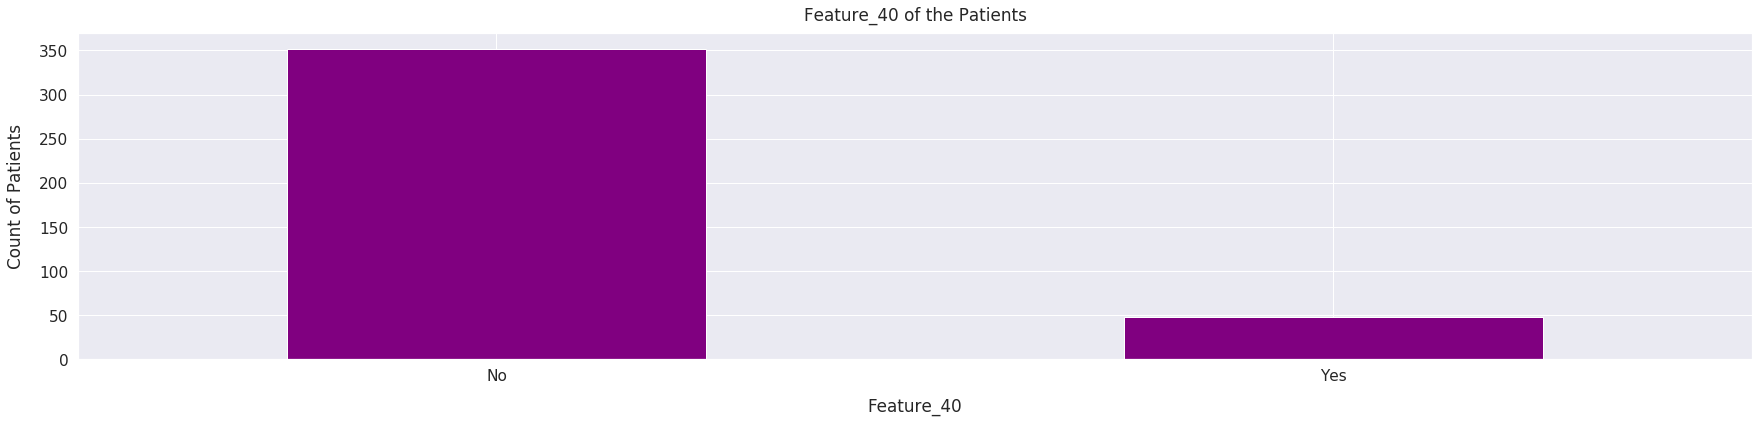

In [21]:
plot_feature_counts('Feature_40')

#### Feature_41

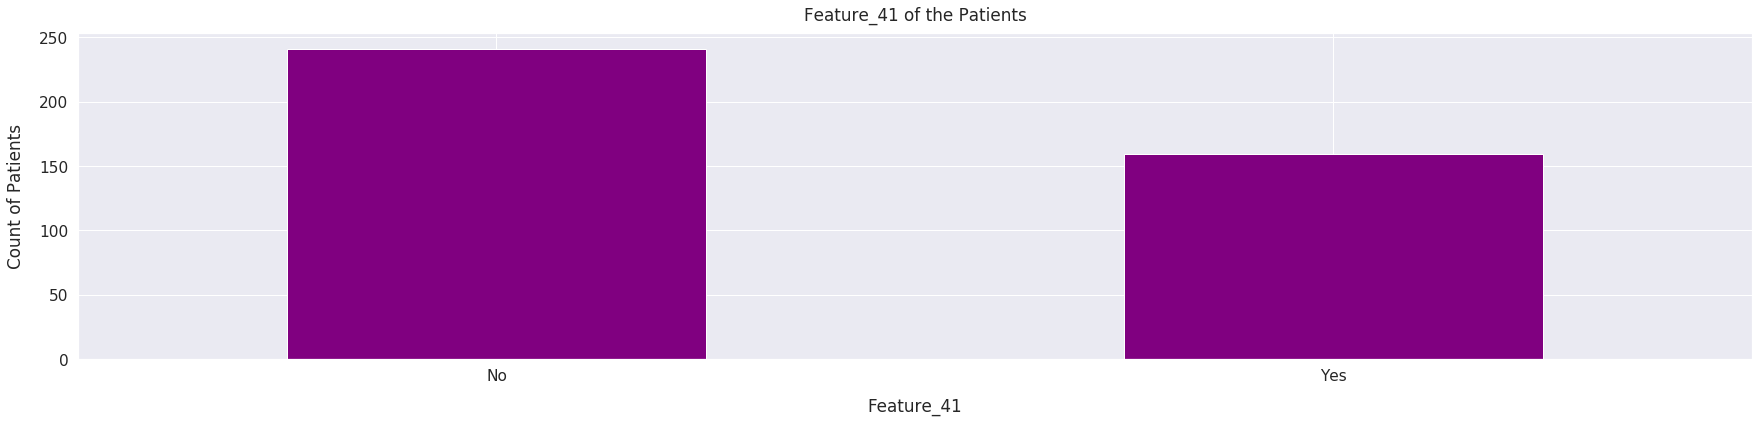

In [22]:
plot_feature_counts('Feature_41')

#### Feature_43

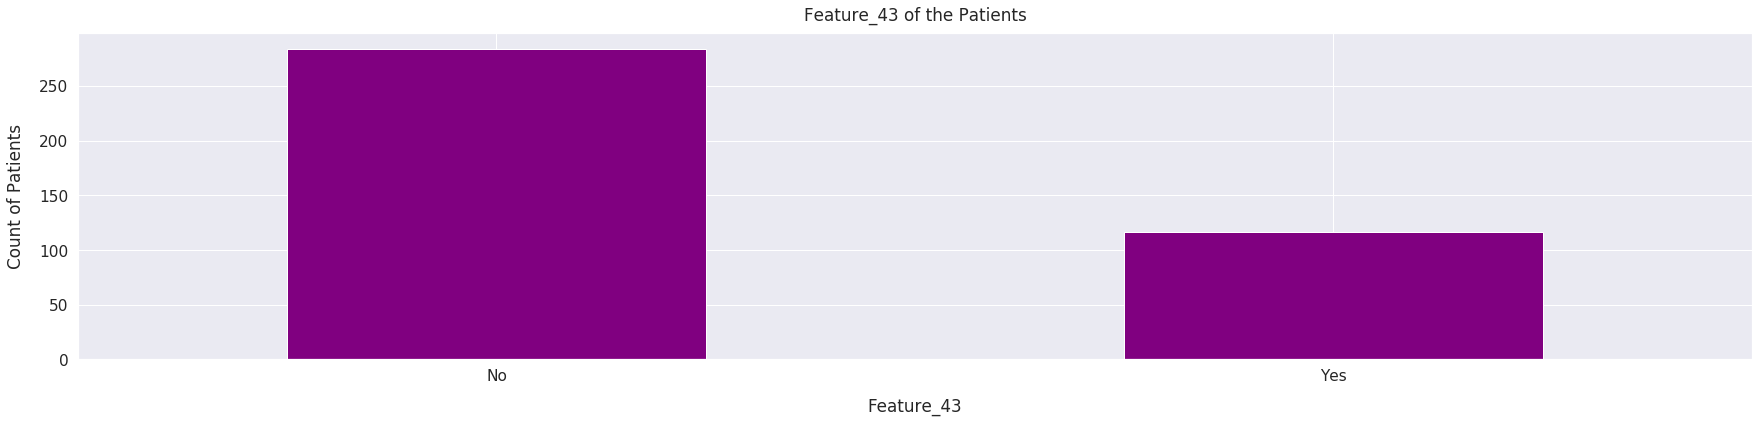

In [23]:
plot_feature_counts('Feature_43')

#### Feature_50

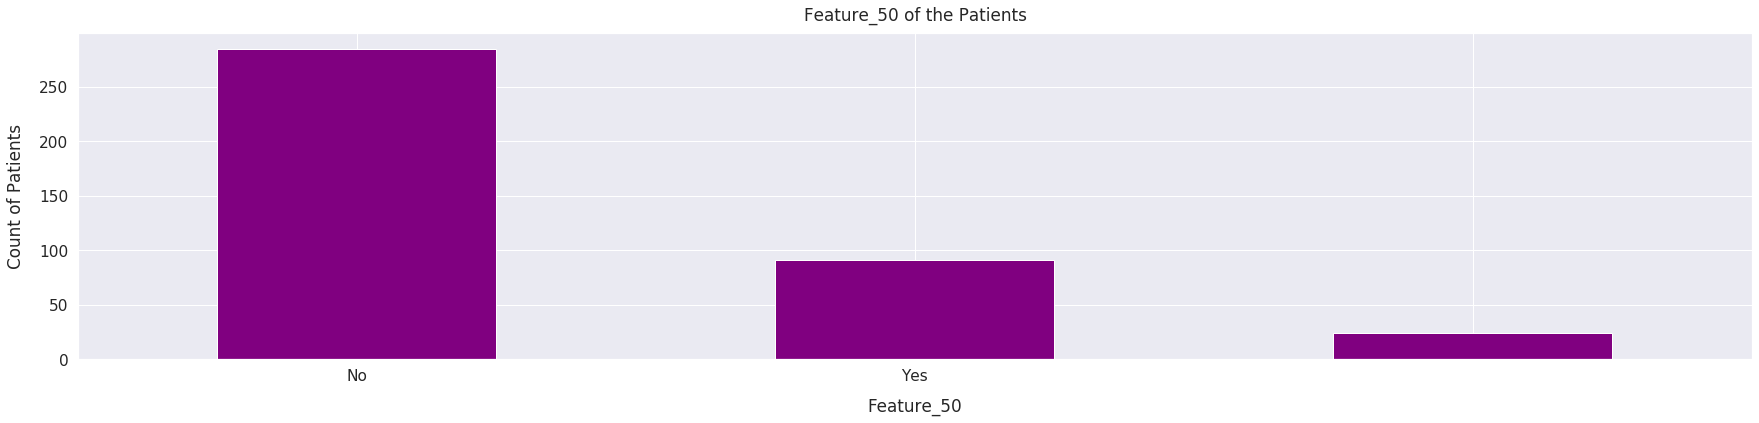

In [24]:
plot_feature_counts('Feature_50')

### Exploratory Data Analysis (EDA)

We used visual methods such as plotting to analyze the general properties of the data set. There are too many properties in data. We can visualize the scatter plot to examine the relationship between some of these properties. Therefore, it may be necessary to remove one of the highly correlated features from the feature set. Because highly correlated features cause excessive overfitting in the model. This reduces test accuracy.

#### Required Libraries

In [25]:
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [26]:
def showPlot(fig, x=22, y=4):
    fig = plt.gcf()
    fig.set_size_inches(x, y)
    plt.show()

### Disease

#### Feature_1

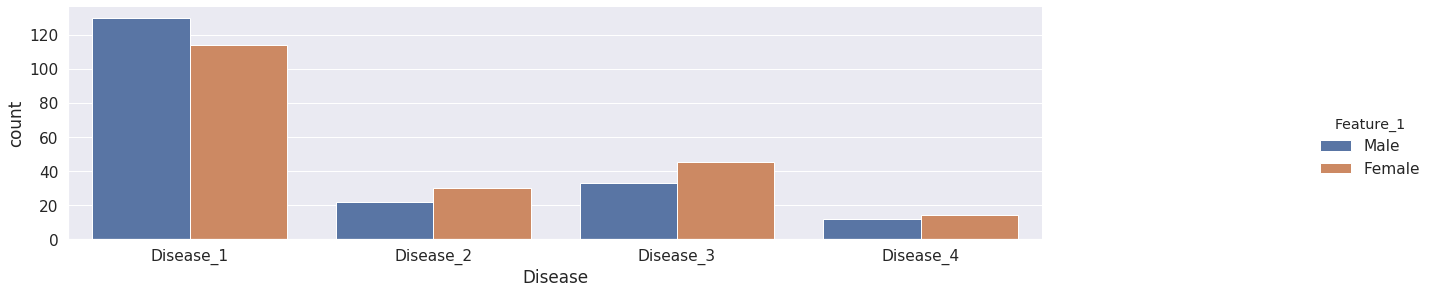

In [27]:
fig = sns.catplot(x='Disease', hue='Feature_1', data=df, kind="count")
showPlot(fig)

Here we learned that disease_1 is mostly seen in men. Disease_2, Disease_3 and Diseae_4 are mostly seen in women.

#### Feature_39

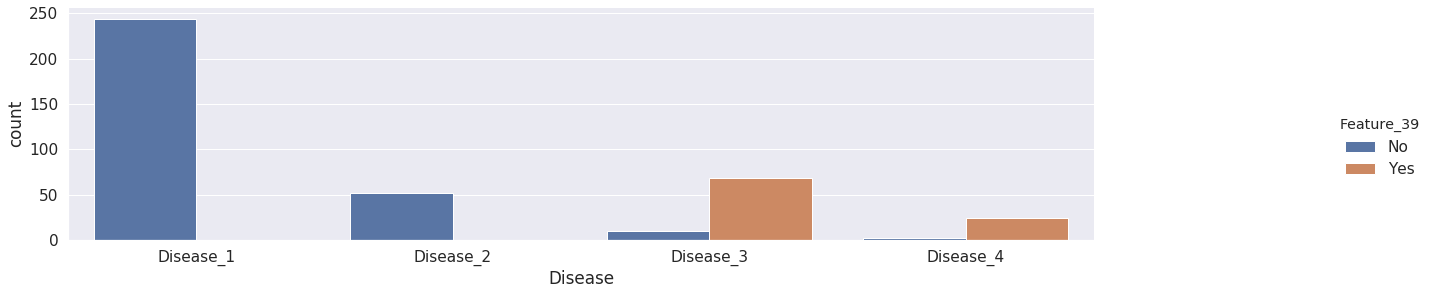

In [28]:
fig = sns.catplot(x='Disease', hue='Feature_39', data=df, kind="count")
showPlot(fig)

When we look at the distribution of Feature_39 according to disease, we come to the following conclusion: Feature_39 may be a determining factor for Disease_3 and Disease_4. Feature_39 may not be one of the symptoms of Disease_1 and Disease_2. 

#### Feature_43

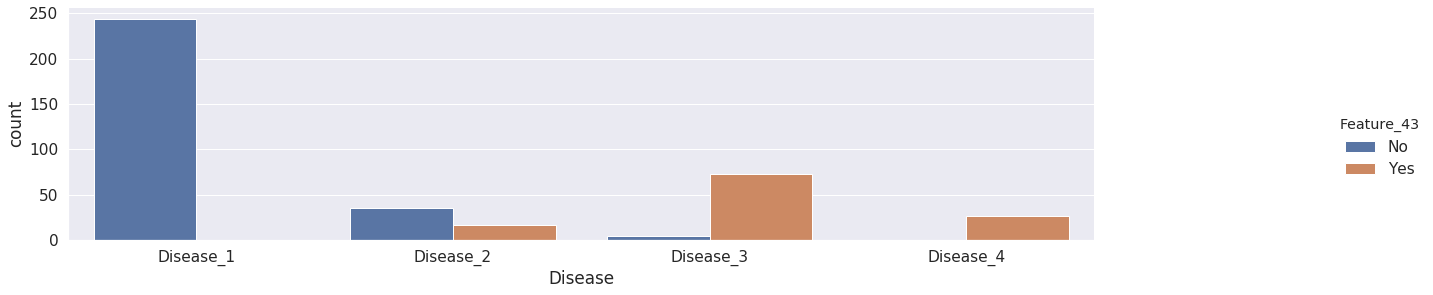

In [29]:
fig = sns.catplot(x='Disease', hue='Feature_43', data=df, kind="count")
showPlot(fig)

When we look at the distribution of Feature_43 according to disease, we come to the following conclusion: Feature_43 may also be a determining factor for Disease_3 and Disease_4. Feature_39 may not be one of the symptoms of Disease_1.

### Conversion of Data Type and Filling in Missing Data

The data type of a column must be int or float. However, if the type of a column is object instead, it may mean that there is usually a non-numeric value in the column that also specifies the erroneous data. If the function throws an error, we can be sure that there is a bad value in the column.

In this section, we converted the data types of features whose data type is object to int. And we replaced the null or empty string values with the most repeating values in the column to which they belong. Since the number of rows in the dataset is not too high, we did not drop the rows with null values.


We found that there are some empty string (' ') values in Feature_47, Feature_48, Feature_49, Feature_50, which take values in the form of yes and no. First of all, we were interested in these values. We replaced the empty string parts below with the most repeating values in the column to which it belongs.

Then we substitute 0 and 1 for yes and no values in the dataset. Here, in order not to enlarge the dataset, we enumerated it ourselves instead of doing one code encoding.Then we applied the enumeration method for feature, whose data type is object in the dataset.

In [30]:
columns = df.columns
for i in columns:
    print(i + '  :  ' + str(df[i].unique()))

Disease  :  ['Disease_1' 'Disease_2' 'Disease_3' 'Disease_4']
Feature_1  :  ['Male' 'Female']
Feature_2  :  [28.   18.   44.   19.   17.5  17.   35.   20.   37.   46.   56.   50.
 29.   21.   64.   23.   52.   26.   45.   53.   16.   25.   14.   38.
 15.   10.   32.   36.   22.   13.   12.   49.   43.   27.   58.   34.
 40.   47.   57.   30.   41.   33.   55.   68.   48.   24.   39.   84.
 42.   31.   72.   28.5  54.   30.5  20.5  25.8  18.7  90.   31.5  48.3
 60.   65.   80.   75.   15.5  28.6  16.5  22.5  11.   10.5  19.5  38.4
 21.5  25.25 62.  ]
Feature_3  :  [130 95 152 112 105.5 100 143 111 138 120 156 181 154 133 131 175 123 105
 114 94 128 153 158 110 104 118 122 145 135 106 101 84 113 92 93 151 107
 117 115 142 102 88 144 155 165 140 159 160 162 161 167 148 141 134 116
 147 149 173 150 157 146 ' ' 178 139 124 108 121 164 87 109 132 123.5 129
 125 142.5 163 127 90 96 126 91 137 171 135.2 168 166 180 124.5 116.5 136
 97 119 98 89 76 125.5 128.5 172]
Feature_4  :  [ 96.   46.  15

In [31]:
most_common_value= df['Feature_47'].value_counts().idxmax()
df.loc[df['Feature_47'].str.contains(' ' , regex=True, na=False), 'Feature_47'] = most_common_value

most_common_value= df['Feature_48'].value_counts().idxmax()
df.loc[df['Feature_48'].str.contains(' ' , regex=True, na=False), 'Feature_48'] = most_common_value

most_common_value= df['Feature_49'].value_counts().idxmax()
df.loc[df['Feature_49'].str.contains(' ' , regex=True, na=False), 'Feature_49'] = most_common_value

most_common_value= df['Feature_50'].value_counts().idxmax()
df.loc[df['Feature_50'].str.contains(' ' , regex=True, na=False), 'Feature_50'] = most_common_value

In [32]:
columns = df.columns
for i in columns:
    if(len( df[i].unique()) == 2):
        df.loc[df[i].str.contains('No' , regex=True, na=False), i] = 0
        df.loc[df[i].str.contains('Yes' , regex=True, na=False), i] = 1
        
        

In [33]:
df.loc[df['Feature_1'].str.contains('Male' , regex=True, na=False), 'Feature_1'] = 0
df.loc[df['Feature_1'].str.contains('Female' , regex=True, na=False), 'Feature_1'] = 1

In [34]:
df.loc[df['Feature_29'].str.contains('No Difference' , regex=True, na=False), 'Feature_29'] = 0
df.loc[df['Feature_29'].str.contains('Evenings' , regex=True, na=False), 'Feature_29'] = 1
df.loc[df['Feature_29'].str.contains('Mornings' , regex=True, na=False), 'Feature_29'] = 2

In [35]:
df.loc[df['Feature_28'].str.contains('Every Day' , regex=True, na=False), 'Feature_28'] = 0
df.loc[df['Feature_28'].str.contains('1-2 Days a Week' , regex=True, na=False), 'Feature_28'] = 1
df.loc[df['Feature_28'].str.contains('3-4 Days a Week' , regex=True, na=False), 'Feature_28'] = 2
df.loc[df['Feature_28'].str.contains('1-2 Days a Month' , regex=True, na=False), 'Feature_28'] = 3
most_common_value= df['Feature_28'].value_counts().idxmax()
df['Feature_28'].fillna(most_common_value, inplace=True)

In [36]:
most_common_value= df['Feature_3'].value_counts().idxmax()
df.loc[df['Feature_3'].str.contains(' ' , regex=True, na=False), 'Feature_3'] = most_common_value
df['Feature_3'] = pd.to_numeric(df['Feature_3'])


In [37]:
df.loc[df['Disease'].str.contains('Disease_1' , regex=True, na=False), 'Disease'] = 0
df.loc[df['Disease'].str.contains('Disease_2' , regex=True, na=False), 'Disease'] = 1
df.loc[df['Disease'].str.contains('Disease_3' , regex=True, na=False), 'Disease'] = 2
df.loc[df['Disease'].str.contains('Disease_4' , regex=True, na=False), 'Disease'] = 3

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 44 columns):
Disease       400 non-null int64
Feature_1     400 non-null int64
Feature_2     400 non-null float64
Feature_3     400 non-null float64
Feature_4     400 non-null float64
Feature_5     400 non-null float64
Feature_6     400 non-null int64
Feature_7     400 non-null int64
Feature_8     400 non-null int64
Feature_9     400 non-null int64
Feature_10    400 non-null int64
Feature_11    400 non-null int64
Feature_12    400 non-null int64
Feature_13    400 non-null int64
Feature_14    400 non-null int64
Feature_15    400 non-null int64
Feature_17    400 non-null int64
Feature_18    400 non-null int64
Feature_20    400 non-null int64
Feature_21    400 non-null int64
Feature_22    400 non-null int64
Feature_23    400 non-null int64
Feature_24    400 non-null int64
Feature_26    400 non-null int64
Feature_27    400 non-null int64
Feature_28    400 non-null int64
Feature_29    400 non-null in

We also applied type conversion for Disease, Feature_1, Feature_28, Feature_29, Feature_3. We did not apply one code encoding here either. Because one code encoding would cause the size of the dataset to increase. This would slow the model down. Therefore, we have given numbers for each category to convert the features whose data type is object to integer type. After these edits, we used the df.info () function to check the final version of the dataset. We saw that the data type of all features is int or float.

### Correlation

In Python, Pandas only provides the dataframe.corr () function to find the relationship between numeric variables. After changing all data types to numeric as they should, we checked if there is a relationship between the independent and target variables. We examined the correlation between this two variables. We drew a heat map to examine the relationship between these values.

We examined the correlation between the heat map we created and all the properties. Some of our conclusions are as follows: Features that are highly correlated with the target label, Disease, are Feature_37, Feature_39, and Feature_43. Apart from that, Feature_44 and Feature_45 are also highly correlated with each other. Also, Feature_39 and Feature_43 are highly correlated.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
corralation = df.corr().round(2)
corralation

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
Disease,1.00,0.08,0.14,0.15,0.23,-0.34,-0.28,0.31,-0.27,0.13,...,0.58,-0.18,0.88,-0.20,-0.20,-0.12,0.04,0.24,0.05,0.52
Feature_1,0.08,1.00,-0.04,-0.03,-0.04,0.01,-0.02,-0.00,-0.02,0.01,...,0.11,-0.07,0.09,-0.04,-0.02,-0.03,0.04,-0.02,0.04,0.09
Feature_2,0.14,-0.04,1.00,0.93,0.89,0.27,-0.33,0.20,0.08,0.09,...,0.15,-0.02,0.15,0.08,0.06,0.15,0.03,0.03,-0.17,0.05
Feature_3,0.15,-0.03,0.93,1.00,0.93,0.21,-0.34,0.19,0.10,0.13,...,0.17,-0.00,0.17,0.10,0.09,0.16,0.04,0.01,-0.17,0.07
Feature_4,0.23,-0.04,0.89,0.93,1.00,0.19,-0.31,0.19,0.02,0.12,...,0.24,-0.04,0.26,0.02,0.00,0.09,0.10,0.04,-0.18,0.15
Feature_5,-0.34,0.01,0.27,0.21,0.19,1.00,0.15,-0.15,0.12,-0.09,...,-0.20,-0.08,-0.30,0.02,-0.04,-0.03,0.03,-0.05,-0.08,-0.17
Feature_6,-0.28,-0.02,-0.33,-0.34,-0.31,0.15,1.00,-0.65,-0.31,-0.31,...,-0.08,-0.06,-0.28,-0.09,-0.11,-0.09,0.04,-0.01,-0.03,-0.00
Feature_7,0.31,-0.00,0.20,0.19,0.19,-0.15,-0.65,1.00,-0.02,0.11,...,0.13,0.01,0.29,-0.00,0.00,-0.02,-0.04,0.02,0.01,0.05
Feature_8,-0.27,-0.02,0.08,0.10,0.02,0.12,-0.31,-0.02,1.00,0.01,...,-0.24,0.07,-0.24,0.09,0.15,0.04,-0.08,-0.06,0.05,-0.16
Feature_9,0.13,0.01,0.09,0.13,0.12,-0.09,-0.31,0.11,0.01,1.00,...,0.23,0.05,0.17,0.11,0.13,0.01,-0.03,0.02,0.04,0.05


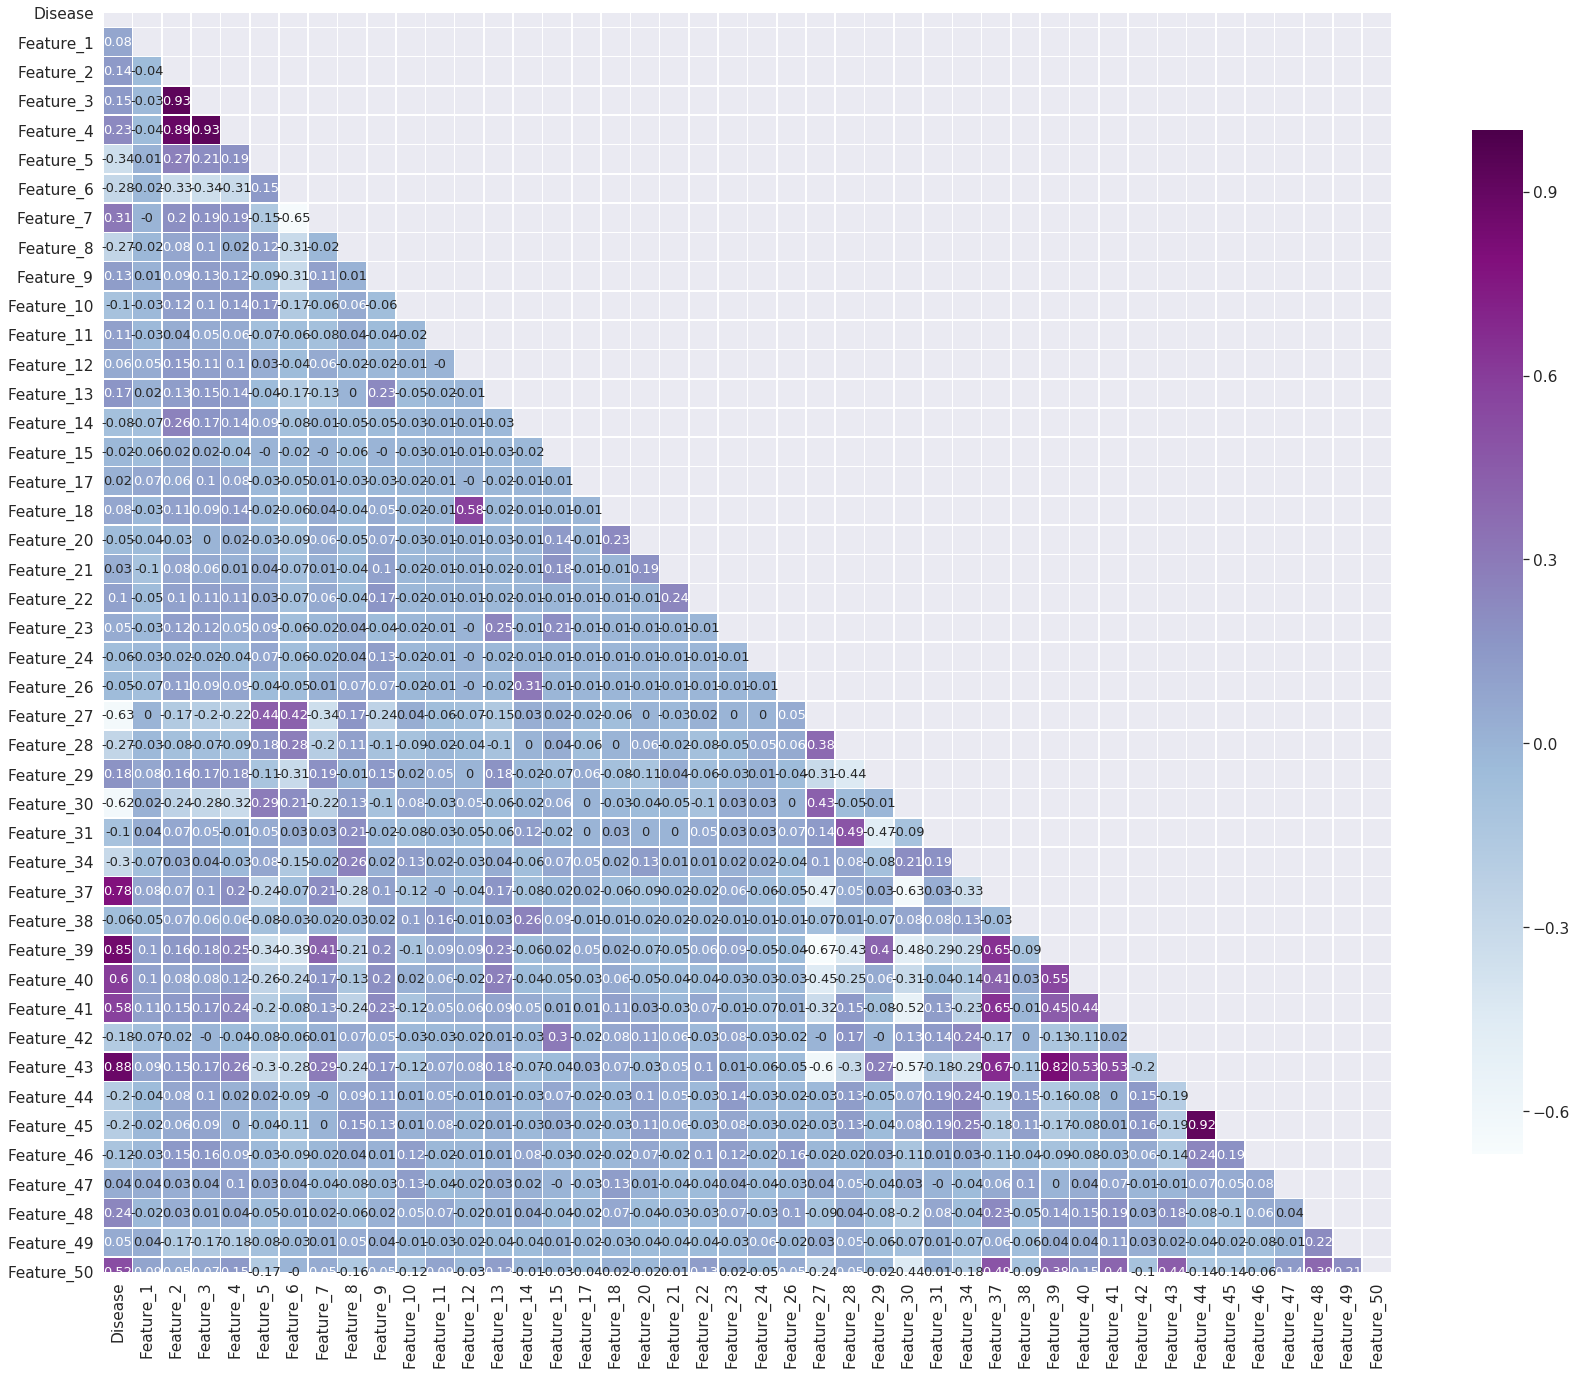

In [40]:
mask = np.zeros_like(corralation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(24, 24))


# Draw the heatmap
sns.heatmap(corralation, mask=mask,cmap= "BuPu",
            square=True, linewidths=.6, cbar_kws={"shrink": .6}, annot=True,annot_kws={'size':13})

plt.tight_layout()

### Separating The Dataset

We first separated the dataset as target and feature set.

In [41]:
X = df.iloc[:,1:]  
y = df.iloc[:,0]    


### Normalization and Train-Test Dataset Separation

Normalization means bringing the numerical data to the same range. Since the data in the dataset to be created in this way will be in the same range, it allows us to create a more accurate model. In this section, we first separated the dataset as train and test and then applied normalization process separately.

In [42]:
def apply_normalization(X):
    columns = X.columns
    for i in columns:
        if(len( X[i].unique()) > 4):

            X[i]=(X[i]-X[i].mean()) / X[i].std()
    return X  

Before the modeling , I installed tensorflow and keras. I used spesific version for these. I installed tensorflow with version **2.5.0-rc3**. And after I installed keras with version **2.5.0**

In [43]:
# Transform into a categorical variable
df.Disease = pd.Categorical(df.Disease)


df.Disease = df.Disease.cat.codes 


from keras.utils.np_utils import to_categorical

y = to_categorical(df.Disease)

print('One-hot encoded Disease: \n',y)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
One-hot encoded Disease: 
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)


In [45]:
X_train = apply_normalization(X_train)
X_test = apply_normalization(X_test)

/home/dilara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
X_train.shape

(280, 43)

## Modeling  <a class="anchor" id="modeling"></a>

So far, we have analyzed and prepared our dataset for the modeling phase. In this section, we created our model. Basically we used supervised learning here.

Supervised learning is training the model on a labeled dataset. In the previous steps, we split our data into feature sets and target variables. We have made a classification here.

Classification is a model learning process that enlightens different preset data classes. It consists of a training step and a prediction step. In the training step, we created a classification model and then, in the prediction step, we predicted which of the existing diseases the data of a patient might belong to.

As a result of the model we will create, we need to give the patient the disease he / she can have as probability. We chose to use a neural network for modeling because we needed to generate a probabilistic output.

We used Keras to model with the Neural network. Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.

First, we created the neural network model as seen below. The model consists of a total of 4 layers, including an input layer, 2 hidden layers and an output layer. We used the relu function as the activation function on the input layer and hidden layers. We used softmax as the activation function on the output layer. Because softmax calculates probability values of possible target layers as output. This is our aim. We used 128 neurons on the input layer, 64 neurons on the first hidden layer, 32 neurons on the second hidden layer and 4 neurons on the output layer.

In [47]:

from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
  
# 3 dense layer
model.add(Dense(128, input_shape=(43,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# output layer with 4 neurons
model.add(Dense(4, activation='softmax'))
  
# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [48]:
model.fit(X_train,y_train,epochs=120)

# Evaluating model
accuracy = model.evaluate(X_test, y_test)[1]


print('Accuracy:', accuracy)

Epoch 1/120
9/9 [==============================] - 9s 1ms/step - loss: 1.3698 - accuracy: 0.3074
Epoch 2/120
9/9 [==============================] - 0s 3ms/step - loss: 1.0093 - accuracy: 0.7876
Epoch 3/120
9/9 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.7881
Epoch 4/120
9/9 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.8005
Epoch 5/120
9/9 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.9146
Epoch 6/120
9/9 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9467
Epoch 7/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9601
Epoch 8/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9686
Epoch 9/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9525
Epoch 10/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9842
Epoch 11/120
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 3.4565e-04 - accuracy: 1.0000
Epoch 84/120
9/9 [==============================] - 0s 2ms/step - loss: 4.1321e-04 - accuracy: 1.0000
Epoch 85/120
9/9 [==============================] - 0s 1ms/step - loss: 4.4151e-04 - accuracy: 1.0000
Epoch 86/120
9/9 [==============================] - 0s 2ms/step - loss: 3.2145e-04 - accuracy: 1.0000
Epoch 87/120
9/9 [==============================] - 0s 2ms/step - loss: 4.4406e-04 - accuracy: 1.0000
Epoch 88/120
9/9 [==============================] - 0s 2ms/step - loss: 3.1675e-04 - accuracy: 1.0000
Epoch 89/120
9/9 [==============================] - 0s 2ms/step - loss: 3.1277e-04 - accuracy: 1.0000
Epoch 90/120
9/9 [==============================] - 0s 2ms/step - loss: 3.3037e-04 - accuracy: 1.0000
Epoch 91/120
9/9 [==============================] - 0s 2ms/step - loss: 4.6694e-04 - accuracy: 1.0000
Epoch 92/120
9/9 [==============================] - 0s 2ms/step - loss: 3.8660e-04 - accuracy: 

First of all, we trained our model with train data. While training the model, we set the number of epochs to be 120. Then we calculated accuracy with test data. When we created and trained models without feature selection, we achieved 0.88 accuracy.

### Feature Selection

We applied the feature selection process to reduce the dataset a little. Because, in the dataset, there may actually be features that do not affect the disease column. Removing some trivial features for classification allows us to build models faster and more accurately with smaller data.

We used sklearn.feature_selection for feature selection. Here, we have obtained the scores indicating the importance of all features by giving the feature set and target label as parameters. Then, after reaching 95% as the score, we removed the remaining features from the dataset.

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



bestfeatures = SelectKBest(score_func=chi2, k=43)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores=featureScores.sort_values(by='Score', ascending=False)
featureScores.columns
total= featureScores['Score'].sum()

featureScores['Score']= (100 / total) * featureScores['Score']
count = 0
score=0
for i in featureScores['Score']:
    if(score < 95 ):
        score +=i
        count += 1
    else:
        break
print(count)
featureScores


19


,Specs,Score
4,Feature_5,27.336858
3,Feature_4,24.446707
31,Feature_39,5.072721
24,Feature_28,4.997447
1,Feature_2,4.704175
35,Feature_43,4.421155
29,Feature_37,3.728386
2,Feature_3,3.288416
32,Feature_40,2.714697
33,Feature_41,2.192885


In [50]:

df2 =featureScores.iloc[count:,0]
X_selected = X
for feature in list(df2):
    X_selected.drop([feature],axis=1, inplace=True)

X_selected

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_34,Feature_37,Feature_39,Feature_40,Feature_41,Feature_43,Feature_44,Feature_50
0,28.0,130.0,96.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,18.0,95.0,46.0,3.0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0
2,44.0,152.0,150.0,1.0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,19.0,112.0,66.0,18.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,17.5,105.5,54.0,3.0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,36.0,142.0,144.0,24.0,0,0,0,2,0,0,1,0,0,0,0,1,0,8,0
396,60.0,172.0,165.0,120.0,0,0,1,0,1,1,1,1,0,0,0,0,0,9,0
397,41.0,147.0,156.0,60.0,0,1,1,2,1,1,1,0,0,0,0,0,0,9,0
398,37.0,138.0,144.0,120.0,0,1,1,2,1,1,1,0,0,0,0,0,0,9,0


### Modeling After Feature Selection

We divided the Selected dataset into train and test to re-create the model. Then, we applied normalization process to the train and test sets we obtained. Then we created the same neural network model with the same activation functions. And we train the model with the selected data set and calculate accuracy with the test set. After eliminating unnecessary features, the accuracy of the created model was 93%. Eliminating unnecessary features had a positive effect on the model and enabled us to create a more accurate model.

In [51]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.30, random_state=0,stratify=y)

In [52]:
X_train_selected = apply_normalization(X_train_selected)
X_test_selected = apply_normalization(X_test_selected)

/home/dilara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
model = Sequential()
  
# 3 dense layers
model.add(Dense(128, input_shape=(count,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  

model.add(Dense(4, activation='softmax'))
  
# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
      

In [54]:
model.fit(X_train_selected,y_train_selected,epochs=120)

# Evaluating model
accuracy = model.evaluate(X_test_selected, y_test_selected)[1]


print('Accuracy:', accuracy)

Epoch 1/120
9/9 [==============================] - 1s 1ms/step - loss: 1.3343 - accuracy: 0.4507
Epoch 2/120
9/9 [==============================] - 0s 2ms/step - loss: 0.9766 - accuracy: 0.7982
Epoch 3/120
9/9 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.8201
Epoch 4/120
9/9 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8934
Epoch 5/120
9/9 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9286
Epoch 6/120
9/9 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9201
Epoch 7/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9250
Epoch 8/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9373
Epoch 9/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9537
Epoch 10/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.9528
Epoch 11/120
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 85/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 86/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 87/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 88/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 89/120
9/9 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 90/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 91/120
9/9 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 92/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 93/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 94/120
9/9 [===============

#### Improving the Model

Here, we investigated whether we can achieve a more accurate model by creating different neural networks. We used the selected data set in our attempts to implement the model.

#### Modeling with Sigmoid Activation Function

When we used sigmoid as the activation function, we achieved an accuracy of 88%. It seems that the relu activation function is more suitable for our dataset. 

In [55]:
model_sigmoid = Sequential()
  

model_sigmoid.add(Dense(128, input_shape=(count,), activation='sigmoid'))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Dense(32, activation='sigmoid'))
  

model_sigmoid.add(Dense(4, activation='softmax'))
  

model_sigmoid.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_sigmoid.fit(X_train_selected,y_train_selected,epochs=120)


accuracy = model_sigmoid.evaluate(X_test_selected, y_test_selected)[1]


print('Accuracy:', accuracy)

Epoch 1/120
9/9 [==============================] - 1s 1ms/step - loss: 1.7824 - accuracy: 0.1671
Epoch 2/120
9/9 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.1944
Epoch 3/120
9/9 [==============================] - 0s 2ms/step - loss: 1.1144 - accuracy: 0.5891
Epoch 4/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0461 - accuracy: 0.6114
Epoch 5/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0062 - accuracy: 0.6357
Epoch 6/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0854 - accuracy: 0.5860
Epoch 7/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0613 - accuracy: 0.5971
Epoch 8/120
9/9 [==============================] - 0s 2ms/step - loss: 0.9893 - accuracy: 0.6345
Epoch 9/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0636 - accuracy: 0.5806
Epoch 10/120
9/9 [==============================] - 0s 2ms/step - loss: 1.0016 - accuracy: 0.6136
Epoch 11/120
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9700
Epoch 85/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9690
Epoch 86/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9731
Epoch 87/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9696
Epoch 88/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9590
Epoch 89/120
9/9 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9705
Epoch 90/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9615
Epoch 91/120
9/9 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.9715
Epoch 92/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9666
Epoch 93/120
9/9 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.9671
Epoch 94/120
9/9 [===============

#### Modeling with Relu Activation Function With 3 Hidden Layer

We created a neural network model with 3 hidden layers together with the Relu activation function. The accuracy of this model is higher than the model with 2 hidden layers. The accuracy of this model came in over 92%.

In [56]:
model__three_hidden = Sequential()
  

model__three_hidden.add(Dense(128, input_shape=(count,), activation='relu'))
model__three_hidden.add(Dense(64, activation='relu'))
model__three_hidden.add(Dense(32, activation='relu'))
model__three_hidden.add(Dense(32, activation='relu'))
  

model__three_hidden.add(Dense(4, activation='softmax'))
  

model__three_hidden.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model__three_hidden.fit(X_train_selected,y_train_selected,epochs=120)


accuracy = model__three_hidden.evaluate(X_test_selected, y_test_selected)[1]


print('Accuracy:', accuracy)

Epoch 1/120
9/9 [==============================] - 1s 2ms/step - loss: 1.3620 - accuracy: 0.3951
Epoch 2/120
9/9 [==============================] - 0s 1ms/step - loss: 1.1312 - accuracy: 0.7637
Epoch 3/120
9/9 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.7693
Epoch 4/120
9/9 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.7962
Epoch 5/120
9/9 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.7893
Epoch 6/120
9/9 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.9187
Epoch 7/120
9/9 [==============================] - 0s 1ms/step - loss: 0.2346 - accuracy: 0.9384
Epoch 8/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9381
Epoch 9/120
9/9 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.9527
Epoch 10/120
9/9 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9565
Epoch 11/120
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 86/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 87/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 88/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 89/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 90/120
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 91/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 92/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 93/120
9/9 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 94/120
9/9 [===============

### Probability Calculation with Test Data

Here, we aimed to find out which of the existing diseases the patient may have with probability values by giving the information of a patient to the model as requested from us in the project. First of all, we obtained a patient data from the test data and we found what the disease of this patient might be with probability values.

In [58]:
small_test = pd.DataFrame(X_test_selected.iloc[12,:])

In [59]:
small_test=small_test.transpose()

In [60]:
preds = model.predict(small_test)
tot= preds[0][0] + preds[0][1]+ preds[0][2] +preds[0][3]
print ('Disease_1 : %'  + str(preds[0][0]*100))
print ('Disease_2 : %'  + str(preds[0][1]*100))
print ('Disease_3 : %'  + str(preds[0][2]*100))
print ('Disease_4 : %'  + str(preds[0][3]*100))
tot

Disease_1 : %1.8625129216687242e-07
Disease_2 : %1.365300406064307e-06
Disease_3 : %99.95843768119812
Disease_4 : %0.041561201214790344


1.0

### Evaluation <a id="evaluation"></a>

First, we created a neural network model using 43 features in the dataset. This model consists of an input layer, two hidden layers and an output layer. We used relu as activation function on the input layer and hidden layers. Since we wanted to obtain a probability output on the output layer, we used softmax as the activation function. We used 128 neurons on the input layer, 64 neurons on the first hidden layer, 32 neuron on the second hidden layer and 4 neurons on the second hidden layer. While training this model, we set the number of epochs as 120. We achieved 87% accuracy with this model.

Later, we eliminated some unnecessary features in the dataset and reduced the feature set to 19 features. We created the same neural network model with the selection data. We trained the model with the selected dataset. We achieved 90% accuracy with this model. As a result, we found that some unnecessary features affect the accuracys of the model. After clearing the dataset from less important features, we got a more accurate model.

After determining the issue of dataset, we thought about how else we can develop the model and created models with different activation functions and different layer numbers. First of all, we created a model by changing the activation function without changing the number of hidden layers and the number of neurons on the layers. In this model, we used sigmoid for activation functions. For the activation function, we trained the model we created using sigmoid with the selected data set. And we achieved 86% accuracy as a result. From this we conclude that relu works better for our datasat.

Finally, we set the activation function as relu. In addition, we created a new neural network model by adding another hidden layer to the model. The accuracy of the model we created with 3 hidden layers was over 90%. We saw that we can increase the accuracy of our model by increasing the number of layers.

As a result, the model we use in our application consists of 1 input layer, 2 hidden layers and 1 output layer. Relu is used as activation function in the input layer and hidden layers. Since we want to obtain a probability output on the output layer, softmax is used as the activation function. 128 neurons are used on the input layer, 64 neurons on the first hidden layer, 32 neurons on the second hidden layer and 4 neurons on the output layer.


### References <a id="references"></a>

__1.__ DataCamp Deep Learning : https://learn.datacamp.com/courses/introduction-to-deep-learning-with-keras

__2.__ DataCamp Deep Learning : https://learn.datacamp.com/courses/introduction-to-deep-learning-in-python

__3.__ Neural Network : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

__4.__ Neural Network : https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

__5.__ https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax

__6.__ https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

__7.__ https://machinelearningmastery.com/softmax-activation-function-with-python/




